In [48]:
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
data = loadmat('emnist-digits-150.mat')
images = data["dataset"]["DigitImage"]["images"]
labels = data["dataset"]["DigitImage"]["labels"]
number_of_data = len(images)
image_array = np.array(images)


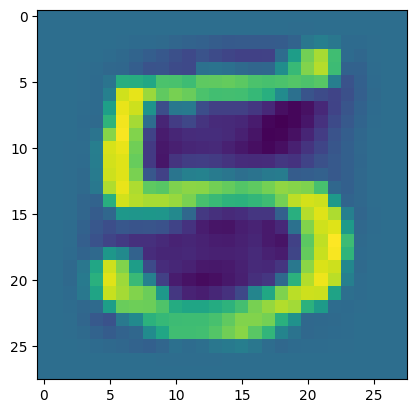

/tmp/ipykernel_21539/2616740991.py:17: RuntimeWarning: invalid value encountered in true_divide
  image_array = np.nan_to_num(image_array/deviation)


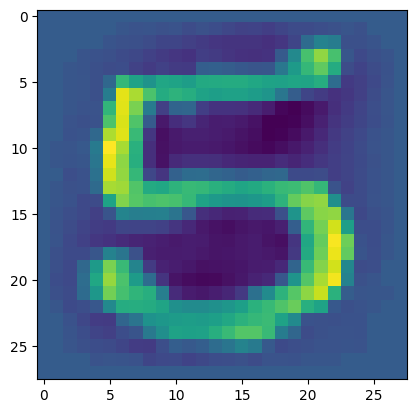

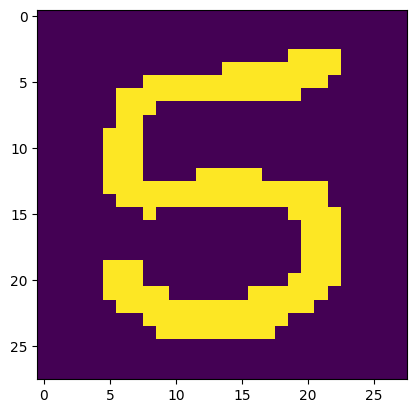

In [49]:
def binarize_image(image: np.array):
    # plt.imshow(image.reshape(28,28).T)
    # plt.show()
    zero_indexs = np.where(image < 128)
    one_indexs = np.where(image >= 128)
    image[zero_indexs] = 0
    image[one_indexs] = 1
    # plt.imshow(image.reshape(28,28).T)
    # plt.show()
    return image
mean = image_array.mean(0)
image_array = image_array - mean
plt.imshow(np.array(image_array[123]).reshape(28,28).T)
plt.show()

deviation = image_array.std(0)
image_array = np.nan_to_num(image_array/deviation)
plt.imshow(np.array(image_array[123]).reshape(28,28).T)
plt.show()
plt.imshow(binarize_image(np.array(images[123]).reshape(28,28)).T)
plt.show()

### Cosine Similarity

In [50]:
similarity_matrix = []
number_of_data = len(images)
for i in range(number_of_data):
    one_image_similarity = []
    for j in range(number_of_data):
        first_image, second_image = binarize_image(np.array(images[i])), binarize_image(np.array(images[j]))
        similarity = np.round(np.dot(first_image, second_image) / (np.linalg.norm(first_image)*np.linalg.norm(second_image)), 4)
        one_image_similarity.append(similarity)
    similarity_matrix.append(one_image_similarity)

np.array(similarity_matrix)

array([[1.    , 0.2873, 0.3931, ..., 0.3124, 0.2837, 0.2069],
       [0.2873, 1.    , 0.5704, ..., 0.3041, 0.3955, 0.1717],
       [0.3931, 0.5704, 1.    , ..., 0.3933, 0.3897, 0.3181],
       ...,
       [0.3124, 0.3041, 0.3933, ..., 1.    , 0.2517, 0.1078],
       [0.2837, 0.3955, 0.3897, ..., 0.2517, 1.    , 0.2796],
       [0.2069, 0.1717, 0.3181, ..., 0.1078, 0.2796, 1.    ]])

### Transitivity Closure

In [51]:
# R = [[1, 0.65, 0.1, 0.21,0], [0.65,1,0.44,.5,.21],[.1,0.44,1,0.44,.1],[0.21,.5,0.44,1,0.65],[0,0.21,0.1,0.65,1]]
R = similarity_matrix
while(True):
    R_dot = []
    for i in range(number_of_data):
        row = []
        for j in range(number_of_data):
            rel = []
            for k in range(number_of_data):
                rel.append(min(R[i][k], R[k][j]))
            row.append(max(rel))
        R_dot.append(row)
    R_prime = []
    for i in range(number_of_data):
        temp = []
        for j in range(number_of_data):
            temp.append (max(R[i][j], R_dot[i][j]))
        R_prime.append(temp)
    if R_prime == R:
        break
    R = R_prime
similarity_matrix = R_prime


### Check for alpha cuts

In [52]:
# alphas = [0.01*i for i in range(0, 100, 5)]
alphas = [0.3, 0.4, 0.5, 0.6, 0.7]

def cluster_a_list(input_list, alpha):
    viewed_images = []
    cluster_with_alpha = []
    # input_list = shuffle(input_list)
    for a in input_list:
        if a in viewed_images:
            continue
        set_cluster = [a]
        for b in input_list:
            if b in viewed_images or b==a:
                continue
            # print(a, b, similarity_matrix[a][b])
            if similarity_matrix[a][b] >= alpha:
                set_cluster.append(b)
                viewed_images.append(b)

        cluster_with_alpha.append(set_cluster)
    return cluster_with_alpha
all_clustering = [[[1*i for i in range(number_of_data)]]]
for alpha in alphas:

    if len(all_clustering[-1]) >= 50:
        break
    new_cluster_set = []
    for list in all_clustering[-1]:
        if len(list) <= 10:
            new_cluster_set.append(list)
            continue
        returned_cluster = cluster_a_list(list, alpha)
        for i in range(len(returned_cluster)):
            new_cluster_set.append(returned_cluster[i])
    all_clustering.append(new_cluster_set)
# print(len(all_clustering))
for clustering in all_clustering:
    print (clustering)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9

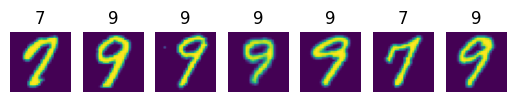

In [53]:
a =  [2, 3, 22, 70, 77, 104, 112]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

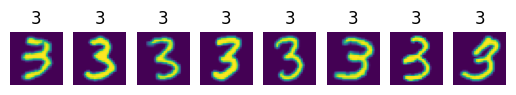

In [54]:
a =  [6, 13, 33, 57, 85, 107, 129, 131]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

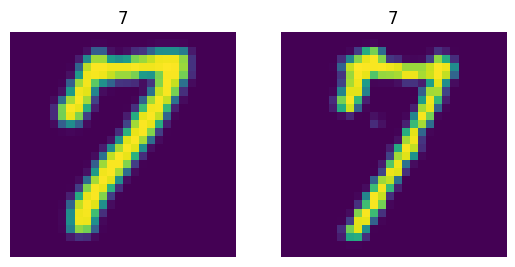

In [55]:
a =   [36, 62]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

In [56]:
all_strings_output = ""
for i in range(len(all_clustering)-1):
    output_string = str(alphas[i]) + ": "
    number_of_claster = len(all_clustering[i+1])
    before_space = ((50 - (number_of_claster - 1)) // 2 ) * " "
    output_string += before_space
    cluster_points = ""
    # print(all_clustering[i+1])
    for cluster in all_clustering[i+1]:
        # print(cluster)
        cluster_points += (len(cluster)//2)* "_"
        cluster_points += " "
    output_string += cluster_points
    output_string += "\n \n"
    all_strings_output += output_string
# print(all_clustering[-1])
print(all_strings_output)


0.3:                          ___________________________________________________________________________ 
 
0.4:                          ___________________________________________________________________________ 
 
0.5:                         __________________________________________________________________________   
 
0.6:           ___________________________________________________________  _  _                          
 
0.7:  _ ___  ____  ____________       _  ___ _   _ _         _  _ _       _                          _  _                          
 

